In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, re, sys

# sklearn stuff
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# keras stuff
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

%matplotlib inline

Using Theano backend.


In [64]:
def delete_relevant(folder):
    if folder[-1] != '/':
        folder += '/'
    files = os.listdir(folder)
    for f in files:
        if re.match(r'u[0-9]+_w[0-9]+_(accelerometer|gyroscope)\.log', f) == None:
            print('deleting %s' % f)
            os.remove(folder + f)

In [65]:
base = './Data/'
for d in os.listdir(base):
    if os.path.isdir(base + d):
        delete_relevant(base + d)

deleting u001_w001_gravity.log
deleting u001_w001_linearaccelerometer.log
deleting u001_w001_magnetometer.log
deleting u001_w001_rotvec.log
deleting u001_w002_gravity.log
deleting u001_w002_linearaccelerometer.log
deleting u001_w002_magnetometer.log
deleting u001_w002_rotvec.log
deleting u001_w003_gravity.log
deleting u001_w003_linearaccelerometer.log
deleting u001_w003_magnetometer.log
deleting u001_w003_rotvec.log
deleting u002_w001_gravity.log
deleting u002_w001_linearaccelerometer.log
deleting u002_w001_magnetometer.log
deleting u002_w001_rotvec.log
deleting u002_w002_gravity.log
deleting u002_w002_linearaccelerometer.log
deleting u002_w002_magnetometer.log
deleting u002_w002_rotvec.log
deleting u002_w003_gravity.log
deleting u002_w003_linearaccelerometer.log
deleting u002_w003_magnetometer.log
deleting u002_w003_rotvec.log
deleting u002_w004_gravity.log
deleting u002_w004_linearaccelerometer.log
deleting u002_w004_magnetometer.log
deleting u002_w004_rotvec.log
deleting u003_w001_g

In [66]:
u_dict = {}
files = [x for x in os.listdir(base) if os.path.isdir(base+x)]
for f in files:
    uid, trial = re.findall(r'u([0-9]+)_w([0-9]+)', f)[0]
    uid, trial = int(uid), int(trial)
    if uid not in u_dict:
        u_dict[uid] = [trial]
    else:
        u_dict[uid].append(trial)

In [67]:
def gen_fname(uid, trial):
    f = lambda x: ('%3d' % x).replace(' ', '0')
    return 'u%s_w%s' % (f(uid), f(trial))

In [77]:
def get_data(uid, trial):
    fname = gen_fname(uid, trial)
    d1 = pd.read_csv('./Data/%s/%s_accelerometer.log' % (fname, fname), delimiter='\t', index_col=0)
#     d2 = pd.read_csv('./Data/%s/%s_gyroscope.log' % (fname, fname), delimiter='\t', index_col=0)
#     return d1.join(d2)
    return d1

In [78]:
a = get_data(18,1)
b = get_data(18,9)

In [85]:
for uid in u_dict:
    trials = u_dict[uid]
    for trial in trials:
        a = get_data(uid, trial)
        data = a.ix[:500,1:].values
        plt.plot(data[:, ])

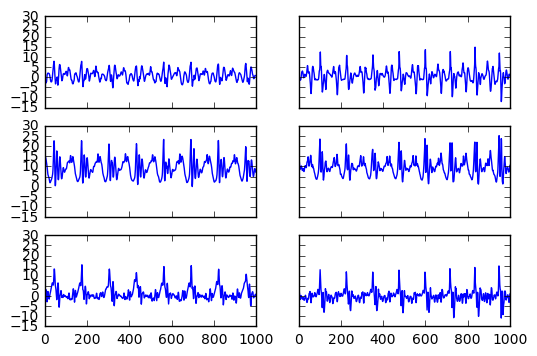

In [57]:
data1 = a.ix[1000:2000,1:].values
data2 = b.ix[1000:2000,1:].values

f, axarr = plt.subplots(3, 2, sharex=True, sharey=True)


for i in range(3):
    axarr[i, 0].plot(data1[:,i])
    axarr[i, 1].plot(data2[:,i])

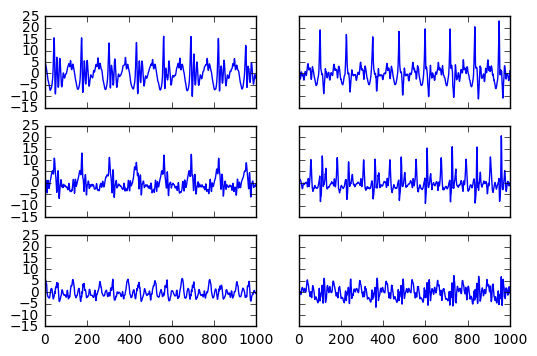

In [54]:
pca = PCA(n_components=3)
data3 = pca.fit_transform(data1)
data4 = pca.fit_transform(data2)

f, axarr = plt.subplots(3, 2, sharex=True, sharey=True)
for i in range(3):
    axarr[i, 0].plot(data3[:,i])
    axarr[i, 1].plot(data4[:,i])